In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [17]:
%pip install seaborn matplotlib scikit-learn pandas numpy


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [18]:
df = pd.read_csv("Weather.csv")
df.head()


,Unnamed: 0,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,0,1901,17.99,19.43,23.49,26.41,28.28,28.60,27.49,26.98,26.26,25.08,21.73,18.95
1,1,1902,19.00,20.39,24.10,26.54,28.68,28.44,27.29,27.05,25.95,24.37,21.33,18.78
2,2,1903,18.32,19.79,22.46,26.03,27.93,28.41,28.04,26.63,26.34,24.57,20.96,18.29
3,3,1904,17.77,19.39,22.95,26.73,27.83,27.85,26.84,26.73,25.84,24.36,21.07,18.84
4,4,1905,17.40,17.79,21.78,24.84,28.32,28.69,27.67,27.47,26.29,26.16,22.07,18.71


In [19]:
df = pd.read_csv("Weather.csv", index_col=0)

In [20]:
df1 = pd.melt(df, id_vars='YEAR', value_vars=df.columns[1:]) ## This will melt the data
df1.head() 

,YEAR,variable,value
0,1901,JAN,17.99
1,1902,JAN,19.00
2,1903,JAN,18.32
3,1904,JAN,17.77
4,1905,JAN,17.40


In [21]:
from datetime import datetime


In [22]:
df1['Date'] = df1['variable'] + ' ' + df1['YEAR'].astype(str)
df1['Date'] = pd.to_datetime(df1['Date'], format='%b %Y').dt.normalize()
df1.head()


,YEAR,variable,value,Date
0,1901,JAN,17.99,1901-01-01
1,1902,JAN,19.00,1902-01-01
2,1903,JAN,18.32,1903-01-01
3,1904,JAN,17.77,1904-01-01
4,1905,JAN,17.40,1905-01-01


In [23]:
import plotly.graph_objects as go


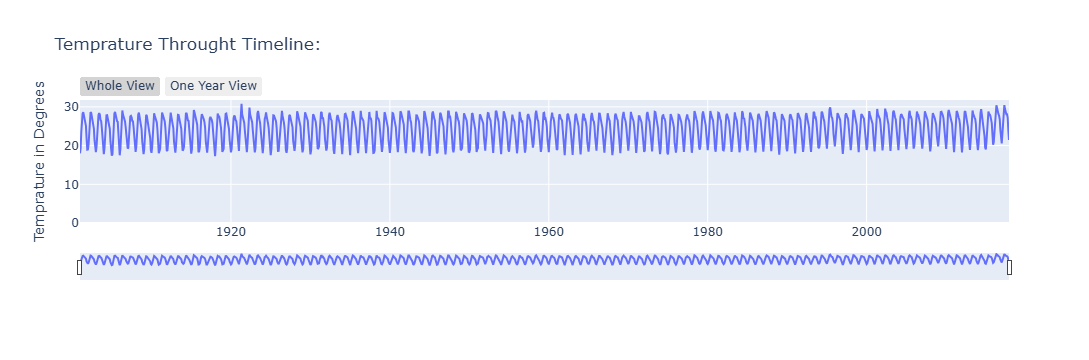

In [24]:
df1.columns=['Year', 'Month', 'Temprature', 'Date']
df1.sort_values(by='Date', inplace=True) ## To get the time series right.
fig = go.Figure(layout = go.Layout(yaxis=dict(range=[0, df1['Temprature'].max()+1])))
fig.add_trace(go.Scatter(x=df1['Date'], y=df1['Temprature']), )
fig.update_layout(title='Temprature Throught Timeline:',
                 xaxis_title='Time', yaxis_title='Temprature in Degrees')
fig.update_layout(xaxis=go.layout.XAxis(
    rangeselector=dict(
        buttons=list([dict(label="Whole View", step="all"),
                      dict(count=1,label="One Year View",step="year",stepmode="todate")                      
                     ])),
        rangeslider=dict(visible=True),type="date")
)
fig.show()

In [25]:
import plotly.express as px

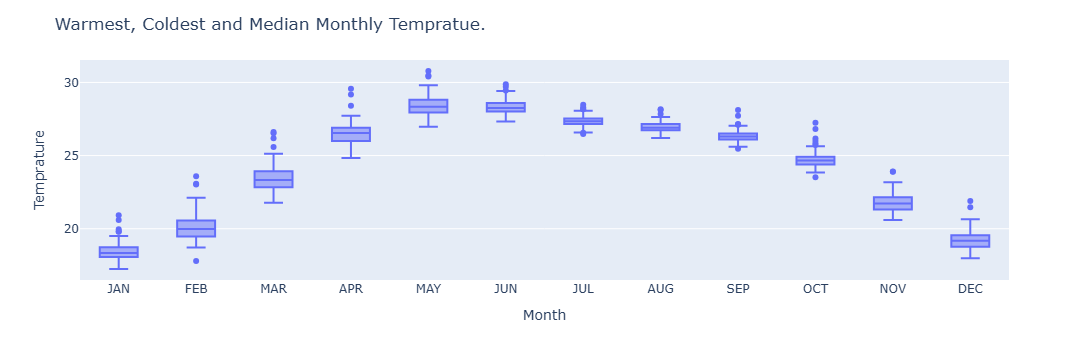

In [26]:
fig = px.box(df1, 'Month', 'Temprature')
fig.update_layout(title='Warmest, Coldest and Median Monthly Tempratue.')
fig.show()

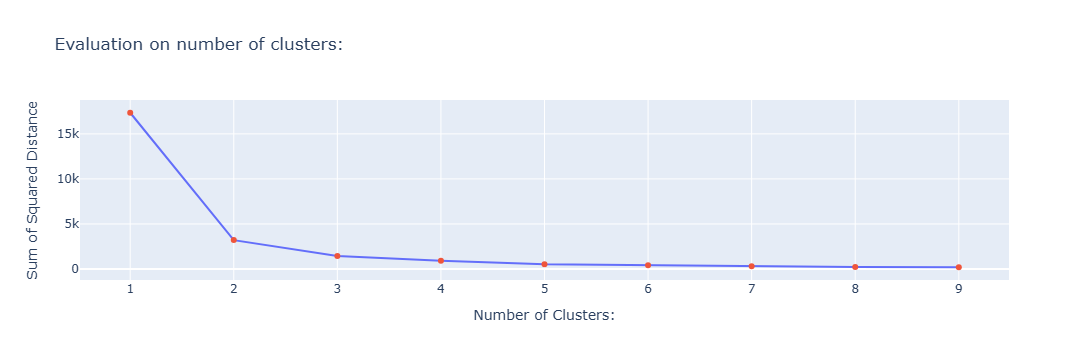

In [27]:
from sklearn.cluster import KMeans
sse = []
target = df1['Temprature'].to_numpy().reshape(-1,1)
num_clusters = list(range(1, 10))

for k in num_clusters:
    km = KMeans(n_clusters=k)
    km.fit(target)
    sse.append(km.inertia_)

fig = go.Figure(data=[
    go.Scatter(x = num_clusters, y=sse, mode='lines'),
    go.Scatter(x = num_clusters, y=sse, mode='markers')
])

fig.update_layout(title="Evaluation on number of clusters:",
                 xaxis_title = "Number of Clusters:",
                 yaxis_title = "Sum of Squared Distance",
                 showlegend=False)
fig.show()

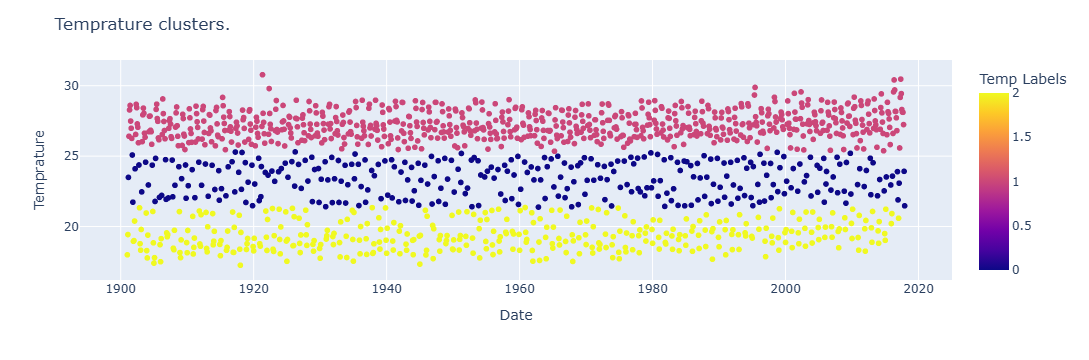

In [28]:
km = KMeans(3)
km.fit(df1['Temprature'].to_numpy().reshape(-1,1))
df1.loc[:,'Temp Labels'] = km.labels_
fig = px.scatter(df1, 'Date', 'Temprature', color='Temp Labels')
fig.update_layout(title = "Temprature clusters.",
                 xaxis_title="Date", yaxis_title="Temprature")
fig.show()

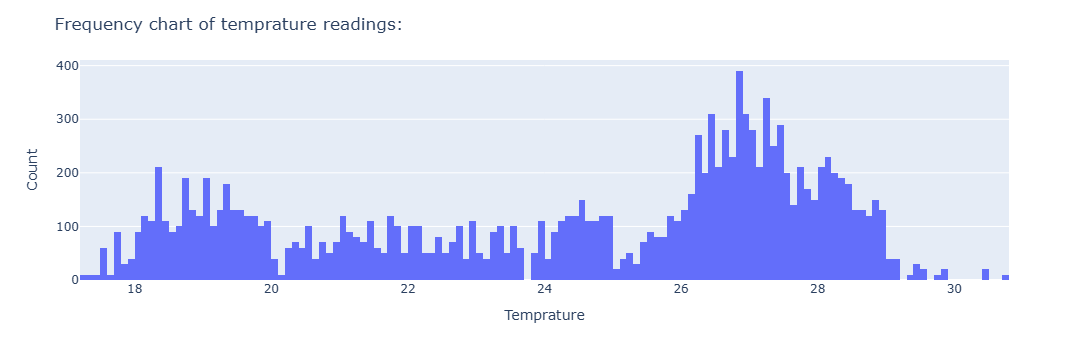

In [29]:
fig = px.histogram(x=df1['Temprature'], nbins=200, histnorm='density')
fig.update_layout(title='Frequency chart of temprature readings:',
                 xaxis_title='Temprature', yaxis_title='Count')

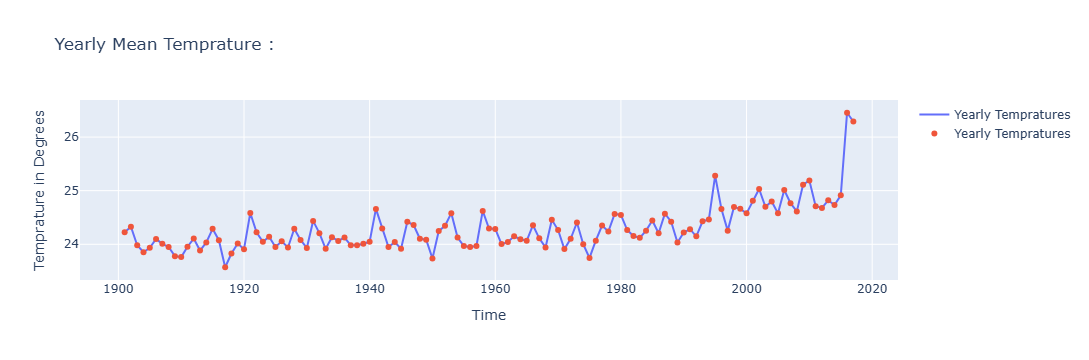

In [30]:
df['Yearly Mean'] = df.iloc[:,1:].mean(axis=1) ## Axis 1 for row wise and axis 0 for columns.
fig = go.Figure(data=[
    go.Scatter(name='Yearly Tempratures' , x=df['YEAR'], y=df['Yearly Mean'], mode='lines'),
    go.Scatter(name='Yearly Tempratures' , x=df['YEAR'], y=df['Yearly Mean'], mode='markers')
])
fig.update_layout(title='Yearly Mean Temprature :',
                 xaxis_title='Time', yaxis_title='Temprature in Degrees')
fig.show()

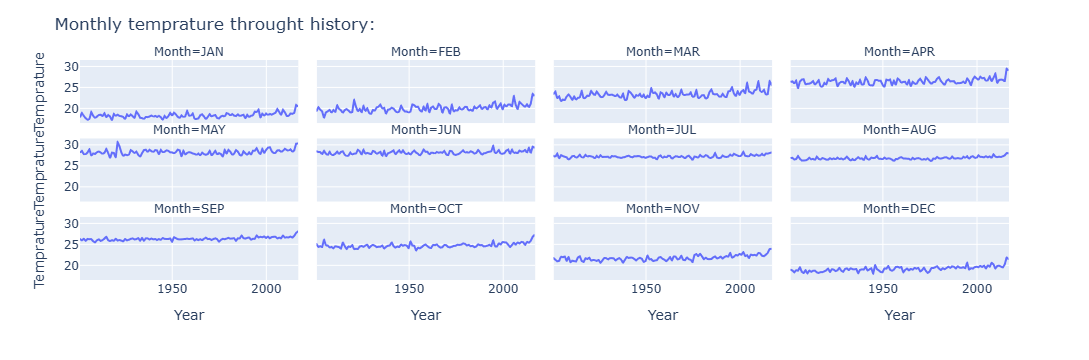

In [31]:
fig = px.line(df1, 'Year', 'Temprature', facet_col='Month', facet_col_wrap=4)
fig.update_layout(title='Monthly temprature throught history:')
fig.show()

In [32]:
%pip install plotly statsmodels


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [33]:
import plotly.express as px


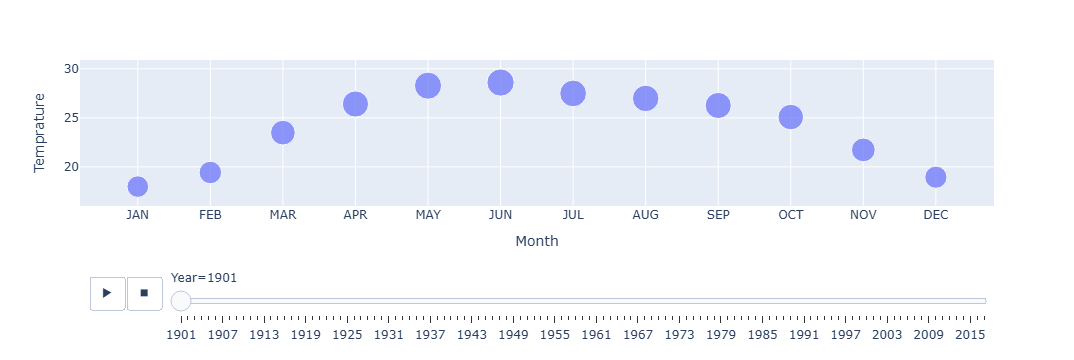

In [35]:
px.scatter(df1, 'Month', 'Temprature', size='Temprature', animation_frame='Year')

In [36]:
# I am using decision tree regressor for prediction as the data does not actually have a linear trend.
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score 

df2 = df1[['Year', 'Month', 'Temprature']].copy()
df2 = pd.get_dummies(df2)
y = df2[['Temprature']]
x = df2.drop(columns='Temprature')

dtr = DecisionTreeRegressor()
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.3)
dtr.fit(train_x, train_y)
pred = dtr.predict(test_x)
r2_score(test_y, pred)

0.9596755707222887

In [37]:
next_Year = df1[df1['Year']==2017][['Year', 'Month']]
next_Year.Year.replace(2017,2018, inplace=True)
next_Year= pd.get_dummies(next_Year)
temp_2018 = dtr.predict(next_Year)

temp_2018 = {'Month':df1['Month'].unique(), 'Temprature':temp_2018}
temp_2018=pd.DataFrame(temp_2018)
temp_2018['Year'] = 2018
temp_2018

C:\Users\akhel\AppData\Local\Temp\ipykernel_29948\2838019938.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





,Month,Temprature,Year
0,JAN,20.59,2018
1,FEB,23.58,2018
2,MAR,25.58,2018
3,APR,29.17,2018
4,MAY,30.47,2018
5,JUN,29.44,2018
6,JUL,28.31,2018
7,AUG,28.12,2018
8,SEP,28.11,2018
9,OCT,27.24,2018


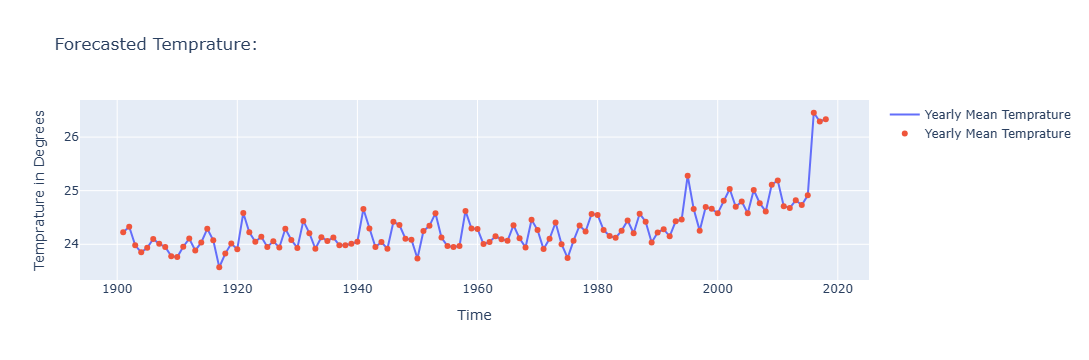

In [38]:
forecasted_temp = pd.concat([df1,temp_2018], sort=False).groupby(by='Year')['Temprature'].mean().reset_index()
fig = go.Figure(data=[
    go.Scatter(name='Yearly Mean Temprature', x=forecasted_temp['Year'], y=forecasted_temp['Temprature'], mode='lines'),
    go.Scatter(name='Yearly Mean Temprature', x=forecasted_temp ['Year'], y=forecasted_temp['Temprature'], mode='markers')
])
fig.update_layout(title='Forecasted Temprature:',
                 xaxis_title='Time', yaxis_title='Temprature in Degrees')
fig.show()